In [1]:
#Import all the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
from mpl_toolkits.mplot3d import Axes3D

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read the CSV file
data = pd.read_csv('C:/COURSES/Regression Analysis/Regression_Simple.csv')

In [4]:
#Rename the columns
data.columns = ['School', 'Rank_2016', 'Rank_2015', 'Rank_2016_Index_Score',
       'Rank_2015_Index_Score', 'BMI-3', '2016_Average_Salary',
       '2016_Job_Placement_Post_MBA','Avg_Salary_increas_from_2015_to_2016',
       '2015_Average_Salary', '2015_Job_Placement_post_MBA']

In [5]:
#Summary Statistics of the data
print(data.shape)
print(data.info())
print(data.describe())

(89, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
School                                  89 non-null object
Rank_2016                               89 non-null int64
Rank_2015                               89 non-null int64
Rank_2016_Index_Score                   89 non-null float64
Rank_2015_Index_Score                   89 non-null float64
BMI-3                                   89 non-null int64
2016_Average_Salary                     87 non-null object
2016_Job_Placement_Post_MBA             87 non-null object
Avg_Salary_increas_from_2015_to_2016    89 non-null object
2015_Average_Salary                     89 non-null object
2015_Job_Placement_post_MBA             89 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 7.7+ KB
None
       Rank_2016  Rank_2015  Rank_2016_Index_Score  Rank_2015_Index_Score  \
count  89.000000  89.000000              89.000000              89.000000   
mean   45.000000  4

In [6]:
#Checking for Nuls
data.isnull().sum()

School                                  0
Rank_2016                               0
Rank_2015                               0
Rank_2016_Index_Score                   0
Rank_2015_Index_Score                   0
BMI-3                                   0
2016_Average_Salary                     2
2016_Job_Placement_Post_MBA             2
Avg_Salary_increas_from_2015_to_2016    0
2015_Average_Salary                     0
2015_Job_Placement_post_MBA             0
dtype: int64

In [7]:
#Treating Null values - Replacing with 0
data['2016_Average_Salary'].fillna(0, inplace = True)
data['2016_Job_Placement_Post_MBA'].fillna(0, inplace = True)

In [8]:
#Define a function to convert string values in salary column to float
def str_float(_sal): return float(re.sub(r'[^0-9.]', '', str(_sal)))
#Convert all strings to float
data['2016_Job_Placement_Post_MBA'] = data['2016_Job_Placement_Post_MBA'].map(lambda x : str_float(x) if pd.notnull(x) else x )
data['2016_Average_Salary'] = data['2016_Average_Salary'].map(lambda x : str_float(x) if pd.notnull(x) else x )
data['2015_Job_Placement_post_MBA'] = data['2015_Job_Placement_post_MBA'].map(lambda x : str_float(x) if pd.notnull(x) else x )
data['2015_Average_Salary'] = data['2015_Average_Salary'].map(lambda x : str_float(x) if pd.notnull(x) else x )

In [9]:
# Impute 0.0 with the column mean value 
data['2016_Average_Salary'] = data['2016_Average_Salary'].map( lambda x : data['2016_Average_Salary'].mean() if x == 0 else x)
data['2016_Job_Placement_Post_MBA'] = data['2016_Job_Placement_Post_MBA'].map( lambda x : data['2016_Job_Placement_Post_MBA'].mean() if x == 0 else x)

In [10]:
#Check the co-relation
data.corr()

,Rank_2016,Rank_2015,Rank_2016_Index_Score,Rank_2015_Index_Score,BMI-3,2016_Average_Salary,2016_Job_Placement_Post_MBA,2015_Average_Salary,2015_Job_Placement_post_MBA
Rank_2016,1.000000,0.905634,-0.980750,-0.900291,-0.347387,-0.837604,-0.620583,-0.838824,-0.630084
Rank_2015,0.905634,1.000000,-0.901810,-0.996163,-0.290431,-0.817826,-0.580386,-0.803622,-0.616268
Rank_2016_Index_Score,-0.980750,-0.901810,1.000000,0.903533,0.326669,0.858608,0.663893,0.851680,0.664604
Rank_2015_Index_Score,-0.900291,-0.996163,0.903533,1.000000,0.291311,0.820692,0.600856,0.804283,0.636239
BMI-3,-0.347387,-0.290431,0.326669,0.291311,1.000000,0.395384,0.286855,0.368850,0.258659
2016_Average_Salary,-0.837604,-0.817826,0.858608,0.820692,0.395384,1.000000,0.477715,0.976392,0.482681
2016_Job_Placement_Post_MBA,-0.620583,-0.580386,0.663893,0.600856,0.286855,0.477715,1.000000,0.487632,0.854633
2015_Average_Salary,-0.838824,-0.803622,0.851680,0.804283,0.368850,0.976392,0.487632,1.000000,0.497865
2015_Job_Placement_post_MBA,-0.630084,-0.616268,0.664604,0.636239,0.258659,0.482681,0.854633,0.497865,1.000000


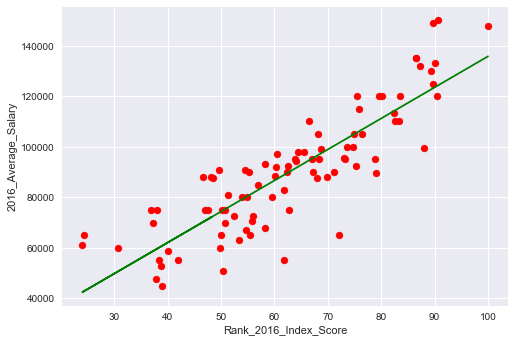

In [11]:
#Firstly perform Linear Regression and check the fit
import statsmodels.api as sm        
x = data['Rank_2016_Index_Score']
y = data['2016_Average_Salary']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
#residual = y.values-predictions
plt.scatter(x['Rank_2016_Index_Score'],y, color = 'red')
plt.xlabel("Rank_2016_Index_Score")
plt.ylabel("2016_Average_Salary")
plt.plot(x['Rank_2016_Index_Score'],predictions, color = 'green')
plt.show()

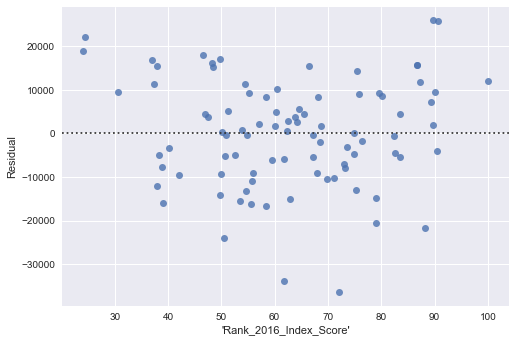

In [16]:
#Residual Plot
import seaborn as sns
x = data['Rank_2016_Index_Score']
y = data['2016_Average_Salary']
sns.residplot(x,y)
plt.xlabel("'Rank_2016_Index_Score'")
plt.ylabel("Residual")
plt.show()

In [13]:
#Model Summary - Linear Regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2016_Average_Salary   R-squared:                       0.737
Model:                             OLS   Adj. R-squared:                  0.734
Method:                  Least Squares   F-statistic:                     244.1
Date:                 Sat, 20 Jan 2018   Prob (F-statistic):           5.60e-27
Time:                         23:32:52   Log-Likelihood:                -964.47
No. Observations:                   89   AIC:                             1933.
Df Residuals:                       87   BIC:                             1938.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.297e+04   5114.459      2.537      0.013    2807.931    2.31e+04
Rank_2016_Index_Score  1228.1377     78.614     15.622      0.000    1071.884    1384.391
==============================================================================
Omnibus:                        2.095   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.638
Skew:                          -0.326   Prob(JB):                        0.441
Kurtosis:                       3.133   Cond. No.                         252.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#Check for Multi-Linear Regression by considering 2 variables
x = data[['Rank_2016_Index_Score', 'BMI-3']]
y = data['2016_Average_Salary']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
residual = y.values-predictions

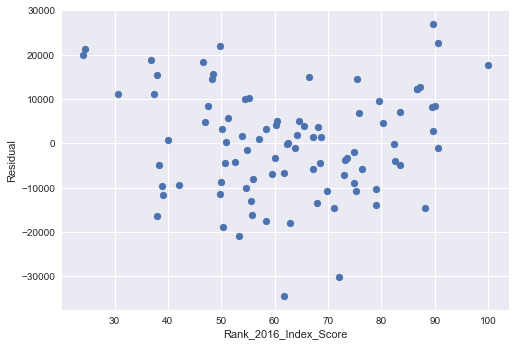

In [18]:
plt.scatter(x['Rank_2016_Index_Score'],residual)
plt.xlabel("Rank_2016_Index_Score")
plt.ylabel("Residual")
plt.show()

In [19]:
#Model summary - MultiLinear Regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2016_Average_Salary   R-squared:                       0.752
Model:                             OLS   Adj. R-squared:                  0.746
Method:                  Least Squares   F-statistic:                     130.4
Date:                 Sat, 20 Jan 2018   Prob (F-statistic):           9.17e-27
Time:                         23:38:11   Log-Likelihood:                -961.89
No. Observations:                   89   AIC:                             1930.
Df Residuals:                       86   BIC:                             1937.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6847.2962   5683.002      1.205      0.232   -4450.137    1.81e+04
Rank_2016_Index_Score  1168.0343     81.272     14.372      0.000    1006.470    1329.599
BMI-3                  2108.7595    931.493      2.264      0.026     257.013    3960.506
==============================================================================
Omnibus:                        0.379   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.318
Skew:                          -0.142   Prob(JB):                        0.853
Kurtosis:                       2.933   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Test data
data_test= pd.DataFrame({'Rank_2016_Index_Score':[75,89,95,101], 'BMI-3':[5,6,7,8]})

In [33]:
data_test = sm.add_constant(data_test)
model.predict(data_test)

0    170844.430455
1    201535.097800
2    215355.689109
3    229176.280418
dtype: float64